<a href="https://colab.research.google.com/github/elmedianikhadija/PROJET_machine_learning/blob/main/REGRESSION_LOGISTIQUE_final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Regression logistique

# Importation des librairies

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Importer la base de donnée

In [11]:
import urllib.request
dataa = "https://raw.githubusercontent.com/elmedianikhadija/PROJET_machine_learning/main/VITAMINE%20D.csv"
data = pd.read_csv(dataa, thousands=',')

# Visualisation des données

In [12]:
data.head()

,ID,sexe,Age,dose,carence
0,15624510,Female,25.0,10.0,1
1,15810944,Male,55.0,24.0,1
2,15668575,Female,19.0,40.0,0
3,15603246,Female,20.0,20.0,1
4,15804002,Male,39.0,790.0,0


# Afficher le base de donnée

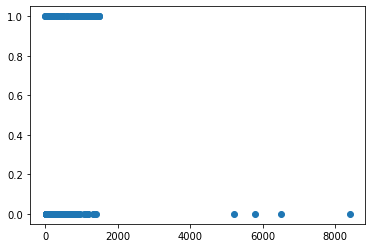

In [5]:
plt.scatter(data.dose, data.carence) 

# Transformer la variable sexe

In [15]:
data.sexe = data.sexe.map({'Male': 1, 'Female': 2})
data.head()

,ID,sexe,Age,dose,carence
0,15624510,2,25.0,10.0,1
1,15810944,1,55.0,24.0,1
2,15668575,2,19.0,40.0,0
3,15603246,2,20.0,20.0,1
4,15804002,1,39.0,790.0,0


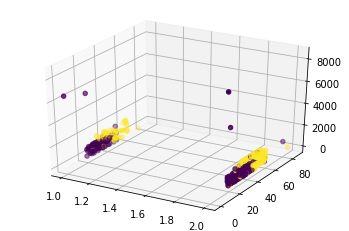

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data.sexe,data.Age,data.dose, c=data.carence)

# Pourcentage des gents carence de vitamine D

In [18]:
count_sub = len(data[data['carence']==1])
count_no_sub = len(data[data['carence']==0])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Pourcentage des gents qui ne peux pas payer le prix de consultation", pct_of_no_sub*100)

Pourcentage des gents qui ne peux pas payer le prix de consultation 64.25


# Influence du sexe

Text(0, 0.5, 'Pourcentage de patient carence  ')

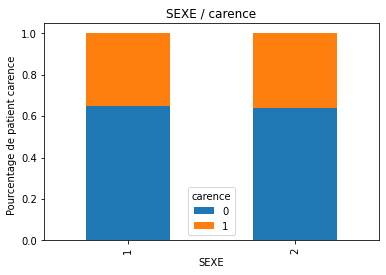

In [20]:
 table= pd.crosstab(data.sexe,data.carence)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('SEXE / carence')
plt.xlabel('SEXE')
plt.ylabel('Pourcentage de patient carence  ')

# suppression de colonne sexe

In [21]:
data.drop(['sexe'],axis='columns',inplace=True)
data.head()

,ID,Age,dose,carence
0,15624510,25.0,10.0,1
1,15810944,55.0,24.0,1
2,15668575,19.0,40.0,0
3,15603246,20.0,20.0,1
4,15804002,39.0,790.0,0


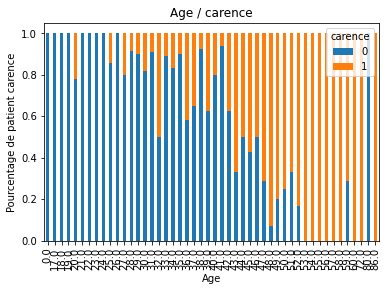

In [23]:
table= pd.crosstab(data.Age,data.carence)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age / carence')
plt.xlabel('Age')
plt.ylabel('Pourcentage de patient carence')
plt.savefig('Age-carence')

Text(0, 0.5, 'Pourcentage de patient carence ')

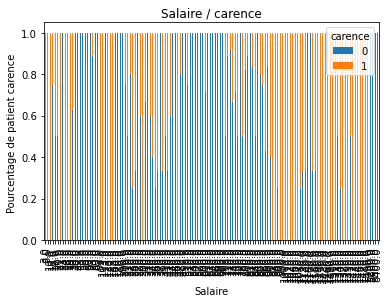

In [24]:
table= pd.crosstab(data.dose,data.carence)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Salaire / carence')
plt.xlabel('Salaire')
plt.ylabel('Pourcentage de patient carence ')

# Définir notre variable dépendante y et nos varaibles indépendantes X

In [25]:
X = data.iloc[:, [1, 2]].values
y = data.iloc[:, -1].values

# Visualisation des points

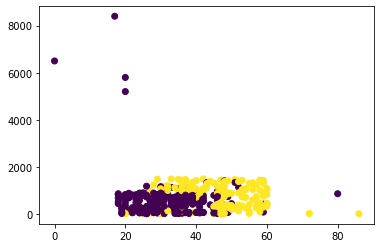

In [26]:
plt.scatter(X[:,0],X[:,1], c=y)

# Diviser le dataset entre le Training set et le Test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-7.65839711e-01,  3.86695561e-01],
       [ 3.52626070e-03, -1.05007138e+00],
       [-2.84985979e-01, -9.76522600e-01],
       [-7.65839711e-01,  2.49860613e-01],
       [-2.84985979e-01, -1.05007138e+00],
       [-1.05435195e+00, -7.59297122e-01],
       [-6.69668965e-01, -1.07914881e+00],
       [-1.88815232e-01,  1.36164456e+00],
       [-1.91988867e+00,  6.17125611e-02],
       [ 8.69062979e-01, -3.65896649e-01],
       [-7.65839711e-01, -2.63270438e-01],
       [-9.58181204e-01, -1.01073134e+00],
       [-9.26444858e-02, -1.01073134e+00],
       [ 9.96970072e-02,  2.15651877e-01],
       [ 4.04269761e+00,  3.69591192e-01],
       [-5.73498218e-01,  8.99826612e-01],
       [-9.26444858e-02,  2.15651877e-01],
       [-1.82371792e+00, -9.59418232e-01],
       [ 1.63842895e+00,  1.12218340e+00],
       [-2.84985979e-01, -7.25088385e-01],
       [-2.84985979e-01, -2.97479175e-01],
       [ 8.69062979e-01,  1.36164456e+00],
       [ 2.92038500e-01, -2.29061701e-01],
       [ 8.

# Construction du modèle

In [29]:
classifier = LogisticRegression(random_state = 0, solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Faire de nouvelles prédictions

In [30]:
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.87

# Matrice de confusion

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[61  5]
 [ 8 26]]


In [32]:
x_predict = sc.transform([[35,150]])
classifier.predict(x_predict)

array([0])

# Visualiser les résultats

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


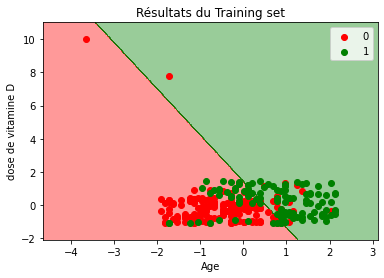

In [35]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Résultats du Training set')
plt.xlabel('Age')
plt.ylabel('dose de vitamine D')
plt.legend()
plt.show()